In [1]:
import numpy as np 
import pandas as pd
import os
os.environ["KERAS_BACKEND"] = "torch"
import keras
import matplotlib.pyplot as plt
import torch
torch.cuda.empty_cache()

dirList = os.listdir("/kaggle/input/traffic-signs-v5/archive(1)/Train")
finDirList = [str(x) for x in dirList]
dictMapping = {}
z=0
for y in dirList:
    dictMapping[z] = y
    z+=1
trainData, valData = keras.utils.image_dataset_from_directory("/kaggle/input/traffic-signs-v5/archive(1)/Train", labels="inferred", label_mode="int", batch_size=64, image_size=(350,350), validation_split=0.3, subset="both", seed=42, shuffle=True, class_names=finDirList)

2025-07-27 22:49:42.809759: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753656582.997325      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753656583.053266      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 39209 files belonging to 43 classes.
Using 27447 files for training.
Using 11762 files for validation.


I0000 00:00:1753656605.442235      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


2
(350, 350, 3)


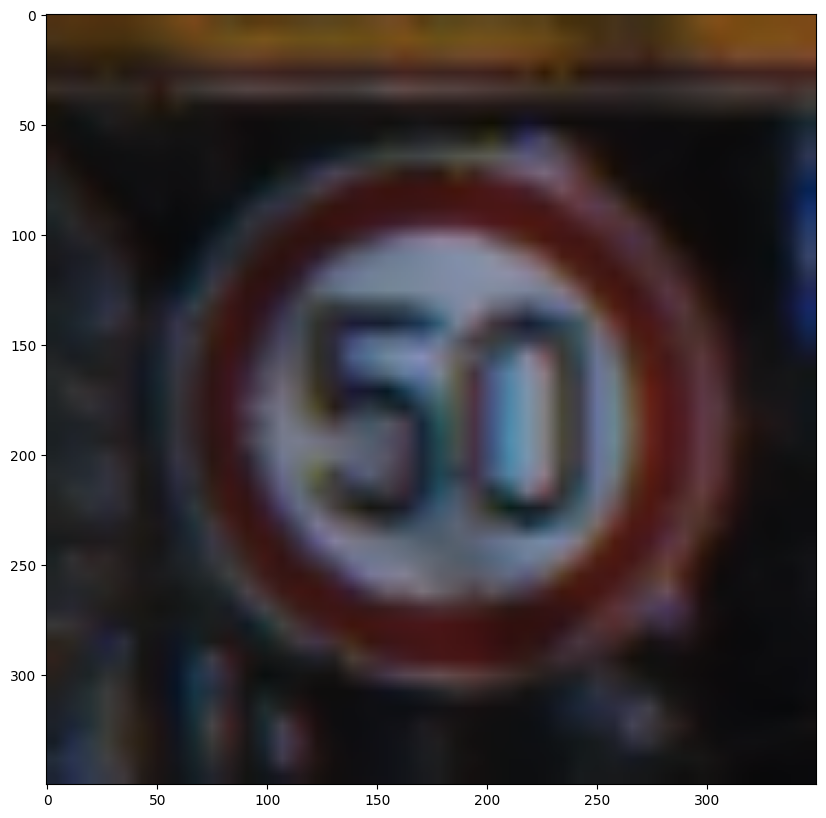

In [2]:
plt.figure(figsize=(10, 10))
for images, labels in trainData.take(1):
    plt.imshow(np.array(images[35]).astype("uint8"))
    value = dictMapping[int(labels[35])]
    print(value)
    print((np.array(images[35]).astype("uint8")).shape)

In [3]:
model = keras.Sequential()
model.add(keras.Input(shape=(350,350,3)))
model.add(keras.layers.Rescaling(scale=1.0/255))
model.add(keras.layers.Conv2D(filters=2, kernel_size=(3,3), strides=(1,1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.ReLU())
model.add(keras.layers.MaxPooling2D(pool_size =(2,2), strides=(2,2)))
model.add(keras.layers.Conv2D(filters=4, kernel_size=(3,3), strides=(1,1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.ReLU())
model.add(keras.layers.MaxPooling2D(pool_size =(2,2), strides=(2,2)))
model.add(keras.layers.Conv2D(filters=8, kernel_size=(3,3), strides=(1,1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.ReLU())
model.add(keras.layers.MaxPooling2D(pool_size =(2,2), strides=(2,2)))
model.add(keras.layers.Conv2D(filters=16, kernel_size=(3,3), strides=(1,1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.ReLU())
model.add(keras.layers.MaxPooling2D(pool_size =(2,2), strides=(2,2)))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.ReLU())
model.add(keras.layers.MaxPooling2D(pool_size =(2,2), strides=(1,1)))
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.ReLU())
model.add(keras.layers.MaxPooling2D(pool_size =(2,2), strides=(1,1)))
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.ReLU())
model.add(keras.layers.MaxPooling2D(pool_size =(2,2), strides=(1,1)))
model.add(keras.layers.GlobalAveragePooling2D())
model.add(keras.layers.Dense(64, 'relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(43, 'linear'))
model.add(keras.layers.Softmax())

In [4]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(), optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [9]:
model.fit(trainData, epochs=15,  validation_data=valData)

Epoch 1/15
429/429 ━━━━━━━━━━━━━━━━━━━━ 60s 140ms/step - accuracy: 0.9897 - loss: 0.0331 - val_accuracy: 0.9816 - val_loss: 0.0573
Epoch 2/15
429/429 ━━━━━━━━━━━━━━━━━━━━ 60s 140ms/step - accuracy: 0.9899 - loss: 0.0345 - val_accuracy: 0.9727 - val_loss: 0.0946
Epoch 3/15
429/429 ━━━━━━━━━━━━━━━━━━━━ 60s 141ms/step - accuracy: 0.9916 - loss: 0.0290 - val_accuracy: 0.9823 - val_loss: 0.0526
Epoch 4/15
429/429 ━━━━━━━━━━━━━━━━━━━━ 60s 140ms/step - accuracy: 0.9911 - loss: 0.0295 - val_accuracy: 0.9911 - val_loss: 0.0292
Epoch 5/15
429/429 ━━━━━━━━━━━━━━━━━━━━ 60s 140ms/step - accuracy: 0.9946 - loss: 0.0169 - val_accuracy: 0.8739 - val_loss: 0.5262
Epoch 6/15
429/429 ━━━━━━━━━━━━━━━━━━━━ 60s 140ms/step - accuracy: 0.9929 - loss: 0.0248 - val_accuracy: 0.9847 - val_loss: 0.0541
Epoch 7/15
429/429 ━━━━━━━━━━━━━━━━━━━━ 61s 141ms/step - accuracy: 0.9940 - loss: 0.0194 - val_accuracy: 0.7375 - val_loss: 1.1888
Epoch 8/15
429/429 ━━━━━━━━━━━━━━━━━━━━ 60s 141ms/step - accuracy: 0.9940 - loss: 0

In [10]:
model.save("/kaggle/working/finalcnn_model.keras")

In [11]:
finalDir = "/kaggle/input/traffic-signs-v5/archive(1)/Test"
os.chdir(finalDir)
results = []
for z in os.listdir():
    splitFile = z.split("_")
    concatPath = os.path.join(finalDir, z)
    imageTest = keras.utils.load_img(concatPath, target_size=(350,350))
    img_array = keras.utils.img_to_array(imageTest)
    img_array = keras.ops.expand_dims(img_array, 0)
    predict = model.predict(img_array, verbose=False)
    predict = np.argmax(predict[0])
    predClass = dictMapping[predict]
    if splitFile[0] == predClass:
        results.append(True)
    else:
        results.append(False)


In [12]:
numTrues = 0
for x in results:
    if x == True:
       numTrues+=1
numTrues/len(results)

0.784006334125099